In [13]:
#https://coding-yoon.tistory.com/131

In [36]:
import numpy as np
import pandas as pd
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt
import os

import datetime

import torch
import torch.nn as nn
from torch.autograd import Variable 

import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

# Data Load

In [50]:
df = pd.read_csv('Data\경기도_cluster1.csv', index_col = 'date', encoding='cp949')
df.head()

,수원시,성남시,안양시,부천시,광명시,안산시,고양시,과천시,구리시,남양주시,시흥시,군포시,의왕시,하남시,용인시,김포시,AVG
date,,,,,,,,,,,,,,,,,
2013-01-01,63.4,67.8,60.5,68.1,53.0,66.8,69.5,63.4,58.9,70.2,67.8,64.5,59.7,62.6,68.8,71.1,64.75625
2013-02-01,63.3,67.2,60.2,67.7,52.9,66.6,69.0,63.1,58.3,69.9,67.2,64.5,59.1,62.4,68.5,70.9,64.42500
2013-03-01,63.2,66.9,60.0,67.4,52.6,66.3,68.6,63.2,58.0,69.7,67.1,64.4,58.7,62.3,68.4,70.8,64.22500
2013-04-01,63.3,67.1,59.8,67.4,52.6,66.3,68.1,64.5,58.1,69.6,67.0,64.8,58.6,62.5,68.4,70.7,64.30000
2013-05-01,63.4,67.5,59.6,67.6,52.9,66.6,68.1,64.8,58.3,69.7,67.2,65.0,58.8,62.9,68.5,71.0,64.49375


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111 entries, 2013-01-01 to 2022-03-01
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   수원시     111 non-null    float64
 1   성남시     111 non-null    float64
 2   안양시     111 non-null    float64
 3   부천시     111 non-null    float64
 4   광명시     111 non-null    float64
 5   안산시     111 non-null    float64
 6   고양시     111 non-null    float64
 7   과천시     111 non-null    float64
 8   구리시     111 non-null    float64
 9   남양주시    111 non-null    float64
 10  시흥시     111 non-null    float64
 11  군포시     111 non-null    float64
 12  의왕시     111 non-null    float64
 13  하남시     111 non-null    float64
 14  용인시     111 non-null    float64
 15  김포시     111 non-null    float64
 16  AVG     111 non-null    float64
dtypes: float64(17)
memory usage: 15.6+ KB


# Train, Test

In [52]:
X = df
y = df.iloc[:, 16:17]

print(X)
print(y)

              수원시    성남시    안양시    부천시    광명시    안산시    고양시    과천시    구리시  \
date                                                                        
2013-01-01   63.4   67.8   60.5   68.1   53.0   66.8   69.5   63.4   58.9   
2013-02-01   63.3   67.2   60.2   67.7   52.9   66.6   69.0   63.1   58.3   
2013-03-01   63.2   66.9   60.0   67.4   52.6   66.3   68.6   63.2   58.0   
2013-04-01   63.3   67.1   59.8   67.4   52.6   66.3   68.1   64.5   58.1   
2013-05-01   63.4   67.5   59.6   67.6   52.9   66.6   68.1   64.8   58.3   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
2021-11-01  109.5  104.8  111.7  110.2  107.3  110.7  107.6  103.1  106.2   
2021-12-01  109.8  105.1  112.0  110.8  107.4  111.2  108.0  103.5  106.4   
2022-01-01  109.8  105.1  111.8  110.8  107.3  111.3  108.1  103.4  106.3   
2022-02-01  109.6  105.0  111.6  110.7  107.3  111.3  108.0  103.4  106.3   
2022-03-01  109.4  105.0  111.2  110.6  107.2  111.2  107.9  103.1  106.3   

In [53]:
# split
ratio = 0.7
prediction_size = int(len(df)*ratio)

In [54]:
prediction_size

77

# 정규화

In [55]:
"""
학습이 잘되기 위해 데이터 정규화 
StandardScaler	각 특징의 평균을 0, 분산을 1이 되도록 변경
MinMaxScaler	최대/최소값이 각각 1, 0이 되도록 변경
"""

from sklearn.preprocessing import StandardScaler, MinMaxScaler
mm = MinMaxScaler()
ss = StandardScaler()

X_ss = ss.fit_transform(X)
y_mm = mm.fit_transform(y) 

# Train Data
X_train = X_ss[:prediction_size, :]
X_test = X_ss[prediction_size:, :]

# Test Data 
y_train = y_mm[:prediction_size, :]
y_test = y_mm[prediction_size:, :] 

print("Training Shape", X_train.shape, y_train.shape)
print("Testing Shape", X_test.shape, y_test.shape) 

Training Shape (77, 17) (77, 1)
Testing Shape (34, 17) (34, 1)


In [56]:
"""
torch Variable에는 3개의 형태가 있다. 
data, grad, grad_fn 한 번 구글에 찾아서 공부해보길 바랍니다. 
"""
X_train_tensors = Variable(torch.Tensor(X_train))
X_test_tensors = Variable(torch.Tensor(X_test))

y_train_tensors = Variable(torch.Tensor(y_train))
y_test_tensors = Variable(torch.Tensor(y_test))

X_train_tensors_final = torch.reshape(X_train_tensors,   (X_train_tensors.shape[0], 1, X_train_tensors.shape[1]))
X_test_tensors_final = torch.reshape(X_test_tensors,  (X_test_tensors.shape[0], 1, X_test_tensors.shape[1])) 

print("Training Shape", X_train_tensors_final.shape, y_train_tensors.shape)
print("Testing Shape", X_test_tensors_final.shape, y_test_tensors.shape) 

Training Shape torch.Size([77, 1, 17]) torch.Size([77, 1])
Testing Shape torch.Size([34, 1, 17]) torch.Size([34, 1])


In [57]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")  # device
print(torch.cuda.get_device_name(0))

NVIDIA GeForce GTX 1050


# LSTM 모델링

In [59]:
class LSTM1(nn.Module):
  def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
    super(LSTM1, self).__init__()
    self.num_classes = num_classes #number of classes
    self.num_layers = num_layers #number of layers
    self.input_size = input_size #input size
    self.hidden_size = hidden_size #hidden state
    self.seq_length = seq_length #sequence length
 
    self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                      num_layers=num_layers, batch_first=True) #lstm
    self.fc_1 =  nn.Linear(hidden_size, 128) #fully connected 1
    self.fc = nn.Linear(128, num_classes) #fully connected last layer

    self.relu = nn.ReLU() 

  def forward(self,x):
    h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)).to(device) #hidden state
    c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)).to(device) #internal state   
    # Propagate input through LSTM

    output, (hn, cn) = self.lstm(x, (h_0, c_0)) #lstm with input, hidden, and internal state
   
    hn = hn.view(-1, self.hidden_size) #reshaping the data for Dense layer next
    out = self.relu(hn)
    out = self.fc_1(out) #first Dense
    out = self.relu(out) #relu
    out = self.fc(out) #Final Output
   
    return out 

## hidden_size 3

In [66]:
num_epochs = 30000 #1000 epochs
learning_rate = 0.00001 #0.001 lr

input_size = 17 #number of features
hidden_size = 3 #number of features in hidden state
num_layers = 1 #number of stacked lstm layers

num_classes = 1 #number of output classes 
lstm1 = LSTM1(num_classes, input_size, hidden_size, num_layers, X_train_tensors_final.shape[1]).to(device)

loss_function = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm1.parameters(), lr=learning_rate)  # adam optimizer

In [67]:
for epoch in range(num_epochs):
  outputs = lstm1.forward(X_train_tensors_final.to(device)) #forward pass
  optimizer.zero_grad() #caluclate the gradient, manually setting to 0
 
  # obtain the loss function
  loss = loss_function(outputs, y_train_tensors.to(device))

  loss.backward() #calculates the loss of the loss function
 
  optimizer.step() #improve from loss, i.e backprop
  if epoch % 100 == 0:
    print("Epoch: %d, loss: %1.5f" % (epoch, loss.item())) 

Epoch: 0, loss: 0.14869
Epoch: 100, loss: 0.13053
Epoch: 200, loss: 0.11433
Epoch: 300, loss: 0.09995
Epoch: 400, loss: 0.08724
Epoch: 500, loss: 0.07609
Epoch: 600, loss: 0.06635
Epoch: 700, loss: 0.05790
Epoch: 800, loss: 0.05063
Epoch: 900, loss: 0.04441
Epoch: 1000, loss: 0.03914
Epoch: 1100, loss: 0.03471
Epoch: 1200, loss: 0.03100
Epoch: 1300, loss: 0.02792
Epoch: 1400, loss: 0.02537
Epoch: 1500, loss: 0.02326
Epoch: 1600, loss: 0.02152
Epoch: 1700, loss: 0.02007
Epoch: 1800, loss: 0.01885
Epoch: 1900, loss: 0.01781
Epoch: 2000, loss: 0.01690
Epoch: 2100, loss: 0.01608
Epoch: 2200, loss: 0.01533
Epoch: 2300, loss: 0.01460
Epoch: 2400, loss: 0.01389
Epoch: 2500, loss: 0.01318
Epoch: 2600, loss: 0.01249
Epoch: 2700, loss: 0.01175
Epoch: 2800, loss: 0.01099
Epoch: 2900, loss: 0.01023
Epoch: 3000, loss: 0.00951
Epoch: 3100, loss: 0.00882
Epoch: 3200, loss: 0.00816
Epoch: 3300, loss: 0.00751
Epoch: 3400, loss: 0.00690
Epoch: 3500, loss: 0.00632
Epoch: 3600, loss: 0.00576
Epoch: 3700, 

Epoch: 29800, loss: 0.00000
Epoch: 29900, loss: 0.00000


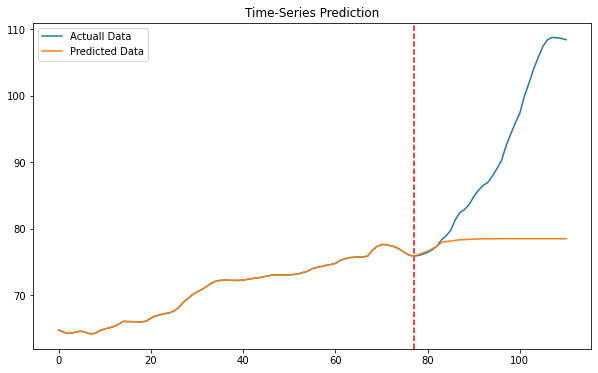

In [68]:
df_X_ss = ss.transform(df)
df_y_mm = mm.transform(df.iloc[:, 16:17])

df_X_ss = Variable(torch.Tensor(df_X_ss)) #converting to Tensors
df_y_mm = Variable(torch.Tensor(df_y_mm))
#reshaping the dataset
df_X_ss = torch.reshape(df_X_ss, (df_X_ss.shape[0], 1, df_X_ss.shape[1]))
train_predict = lstm1(df_X_ss.to(device))#forward pass
data_predict = train_predict.data.detach().cpu().numpy() #numpy conversion
dataY_plot = df_y_mm.data.numpy()

data_predict = mm.inverse_transform(data_predict) #reverse transformation
dataY_plot = mm.inverse_transform(dataY_plot)
plt.figure(figsize=(10,6)) #plotting
plt.axvline(x=77, c='r', linestyle='--') #size of the training set

plt.plot(dataY_plot, label='Actuall Data') #actual plot
plt.plot(data_predict, label='Predicted Data') #predicted plot
plt.title('Time-Series Prediction')
plt.legend()
plt.show() 

## hidden_size 2

In [83]:
num_epochs = 5000 #1000 epochs
learning_rate = 0.00001 #0.001 lr

input_size = 17 #number of features
hidden_size = 2 #number of features in hidden state
num_layers = 1 #number of stacked lstm layers

num_classes = 1 #number of output classes 
lstm1 = LSTM1(num_classes, input_size, hidden_size, num_layers, X_train_tensors_final.shape[1]).to(device)

loss_function = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm1.parameters(), lr=learning_rate)  # adam optimizer

In [84]:
for epoch in range(num_epochs):
  outputs = lstm1.forward(X_train_tensors_final.to(device)) #forward pass
  optimizer.zero_grad() #caluclate the gradient, manually setting to 0
 
  # obtain the loss function
  loss = loss_function(outputs, y_train_tensors.to(device))

  loss.backward() #calculates the loss of the loss function
 
  optimizer.step() #improve from loss, i.e backprop
  if epoch % 100 == 0:
    print("Epoch: %d, loss: %1.5f" % (epoch, loss.item())) 

Epoch: 0, loss: 0.06673
Epoch: 100, loss: 0.05289
Epoch: 200, loss: 0.04194
Epoch: 300, loss: 0.03346
Epoch: 400, loss: 0.02707
Epoch: 500, loss: 0.02236
Epoch: 600, loss: 0.01900
Epoch: 700, loss: 0.01665
Epoch: 800, loss: 0.01505
Epoch: 900, loss: 0.01397
Epoch: 1000, loss: 0.01325
Epoch: 1100, loss: 0.01274
Epoch: 1200, loss: 0.01238
Epoch: 1300, loss: 0.01211
Epoch: 1400, loss: 0.01189
Epoch: 1500, loss: 0.01170
Epoch: 1600, loss: 0.01153
Epoch: 1700, loss: 0.01137
Epoch: 1800, loss: 0.01122
Epoch: 1900, loss: 0.01108
Epoch: 2000, loss: 0.01095
Epoch: 2100, loss: 0.01082
Epoch: 2200, loss: 0.01070
Epoch: 2300, loss: 0.01058
Epoch: 2400, loss: 0.01046
Epoch: 2500, loss: 0.01035
Epoch: 2600, loss: 0.01024
Epoch: 2700, loss: 0.01014
Epoch: 2800, loss: 0.01004
Epoch: 2900, loss: 0.00994
Epoch: 3000, loss: 0.00985
Epoch: 3100, loss: 0.00976
Epoch: 3200, loss: 0.00967
Epoch: 3300, loss: 0.00958
Epoch: 3400, loss: 0.00949
Epoch: 3500, loss: 0.00940
Epoch: 3600, loss: 0.00932
Epoch: 3700, 

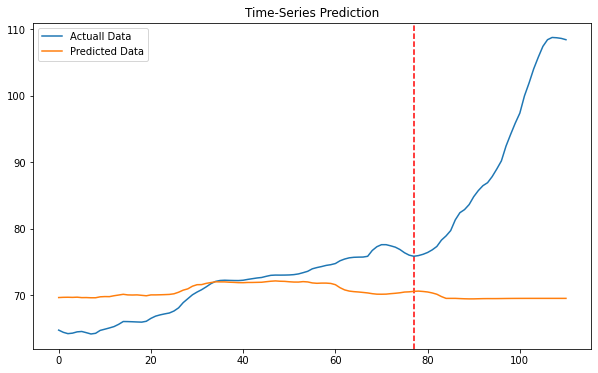

In [85]:
df_X_ss = ss.transform(df)
df_y_mm = mm.transform(df.iloc[:, 16:17])

df_X_ss = Variable(torch.Tensor(df_X_ss)) #converting to Tensors
df_y_mm = Variable(torch.Tensor(df_y_mm))
#reshaping the dataset
df_X_ss = torch.reshape(df_X_ss, (df_X_ss.shape[0], 1, df_X_ss.shape[1]))
train_predict = lstm1(df_X_ss.to(device))#forward pass
data_predict = train_predict.data.detach().cpu().numpy() #numpy conversion
dataY_plot = df_y_mm.data.numpy()

data_predict = mm.inverse_transform(data_predict) #reverse transformation
dataY_plot = mm.inverse_transform(dataY_plot)
plt.figure(figsize=(10,6)) #plotting
plt.axvline(x=77, c='r', linestyle='--') #size of the training set

plt.plot(dataY_plot, label='Actuall Data') #actual plot
plt.plot(data_predict, label='Predicted Data') #predicted plot
plt.title('Time-Series Prediction')
plt.legend()
plt.show() 